![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

**Ideia original**: Luan Lima

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Teste 2: Erros no algoritmo da bisseção

## Questão 1: Todos os pontos da bisseção

Neste teste vamos estudar a evolução do erro no eixo $y$ no decorrer do algoritmo da bisseção.
Para isso, vamos usar uma variação do método da bisseção que retorne
uma lista com todos os pontos percorridos pelo algoritmo até atingir o critério de parada.

Implemente a função `bissecao_pts`, utilizando como critérios de parada `xtol`, `ytol` e `maxiter`.

In [2]:
def criterio_parada(a,b,xtol,niter,maxiter,ytol,f):
    return abs(a - b) < xtol or niter == maxiter or np.abs( f((a+b)/2)  ) < ytol
def bissecao_pts(f, a, b, xtol=1e-8, ytol=1e-8, maxiter=100):
    """
    Encontra uma raiz de  f  pelo algoritmo da bissecao, retornando
    todos os pontos pelos quais o algoritmo passa.
    """
    num_iter = 0
    pts = []
    #supoe fb > fa
    if(f(a) > f(b)):
        aux = b
        b = a
        a = aux
    fcalls = 2
    while(not criterio_parada(a,b,xtol,num_iter,maxiter,ytol,f)):
        m = (a+b)/2
        pts.append(m)
        if(f(m) > 0):
            b = m
        else:
            a = m   
        num_iter += 1
        fcalls += 1
    pts.append((a+b)/2)
    return pts
    ##return (a+b)/2, num_iter, fcalls

Alguns testes básicos para esta nova bisseção.

In [3]:
def p(a): 
    def f(x): return np.tan(x)-a
    return f

In [4]:
pts = bissecao_pts(p(1),0,np.pi/2, ytol=0)
assert abs(pts[-1]-np.pi/4) < 1e-8

In [5]:
for a in np.logspace(1,4):
    pts = bissecao_pts(p(a),0,np.pi/2, xtol=0)
    assert 1e-10 < abs(np.tan(pts[-1])-a) < 1e-8, (a, abs(np.tan(pts[-1])-a), len(pts))
    assert 1e-8 < abs(np.tan(pts[-2])-a)

In [6]:
for n in range(2,10):
    pts = bissecao_pts(p(n),0,np.pi/2, xtol=0)
    print(len(pts))
    assert 25 < len(pts) <= 35

29
29
30
31
32
32
33
33


## Questão 2: Aquecimento

Vamos começar estudando como se comporta o erro em $y$ para a função $f(x) = \sin(x)$. Faça um gráfico que contenha:
- no eixo horizontal, o número $n$ de iterações realizadas
- no eixo vertical, o erro em $y$ após a $n$-ésima iteração.

Utilize o intervalo padrão abaixo para todas as questões do teste.

In [7]:
a = -1+1e-12
b = 1/2

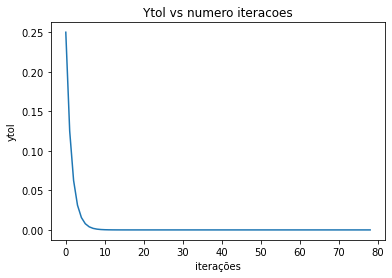

In [8]:
pts = bissecao_pts(np.cbrt, a, b, xtol=0, ytol=1e-8, maxiter=1000)
yerror = np.abs(pts)
plt.plot(np.arange(len(yerror)), yerror)
plt.xlabel("iterações")
plt.ylabel("ytol")
plt.title("Ytol vs numero iteracoes")
plt.show()

Comente o gráfico. O que você observa sobre a velocidade de convergência do método?

A convergência é bem rápida pois o erro em y decai de forma exponencial.

Agora represente, em um mesmo gráfico, a evolução do erro em $y$ para as funções $f(x) = \sin(x)$ e $g(x) = \sqrt[3]{x}$ (use `np.cbrt`).

Não se esqueça de botar título, legendas e labels nos eixos.

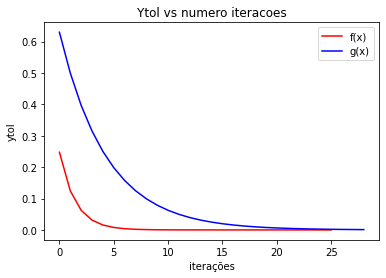

In [9]:
ax = plt.gca()
g = np.cbrt
f = np.sin
pts = bissecao_pts(f, a, b, xtol=1e-8, ytol=1e-8, maxiter=100)
f_error = np.abs(f(pts))
pts = bissecao_pts(g, a, b, xtol=1e-8, ytol=1e-8, maxiter=100)
g_error = np.abs(g(pts))
ax.plot(np.arange(len(f_error)), f_error,color='r', label="f(x)")
ax.plot(np.arange(len(g_error)), g_error,color='b', label="g(x)")
#ax.legend(["g(x)","f(x)"])
ax.legend()
ax.set_xlabel("iterações")
ax.set_ylabel("ytol")
ax.set_title("Ytol vs numero iteracoes")
plt.show()

In [10]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2

In [11]:
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""
assert ax.get_ylabel() != ""

Compare a velocidade de convergência do método relativamente às duas funções. Como você explica essa diferença? Sinta-se à vontade para utilizar mais gráficos ou caixas de código para ajudar na sua explicação.

Text(0, 0.5, 'sin(x)')

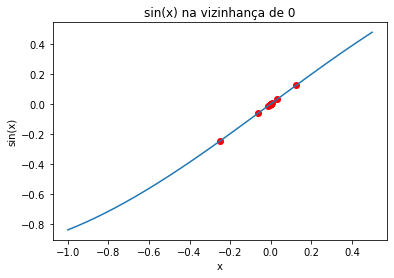

In [12]:
ax = plt.gca()
x = np.arange(-1+1e-12,1/2,0.0001)
y = np.sin(x)
pts = bissecao_pts(f, a, b, xtol=1e-8, ytol=1e-8, maxiter=100)
ax.plot(x,y)
ax.scatter(pts,f(pts),color='r')
ax.set_title("sin(x) na vizinhança de 0")
ax.set_xlabel("x")
ax.set_ylabel("sin(x)")

Text(0, 0.5, 'cbrt(x)')

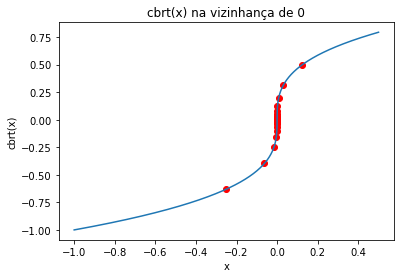

In [13]:
ax = plt.gca()
x = np.arange(-1+1e-12,1/2,0.0001)
y = np.cbrt(x)
pts = bissecao_pts(g, a, b, xtol=1e-8, ytol=1e-8, maxiter=100)
ax.plot(x,y)
ax.scatter(pts,g(pts),color='r')
ax.set_title("cbrt(x) na vizinhança de 0")
ax.set_xlabel("x")
ax.set_ylabel("cbrt(x)")

Text(0.5, 1.0, 'Log(tol) vs numero iteracoes')

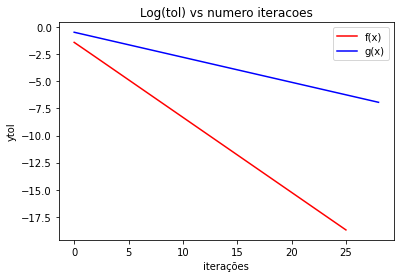

In [14]:
ax = plt.gca()
ax.plot(np.arange(len(f_error)), np.log(f_error), color='r', label="f(x)")
ax.plot(np.arange(len(g_error)), np.log(g_error), color='b', label="g(x)")
#ax.legend(["g(x)","f(x)"])
ax.legend()
ax.set_xlabel("iterações")
ax.set_ylabel("ytol")
ax.set_title("Log(tol) vs numero iteracoes")

Text(0.5, 1.0, 'Razão de convergencia')

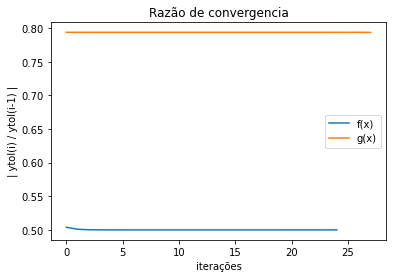

In [43]:
ax = plt.gca()
r_f = [np.abs(f_error[i]/f_error[i-1]) for i in range(1,len(f_error))]
r_g = [np.abs(g_error[i]/g_error[i-1]) for i in range(1,len(g_error))]
ax.plot(np.arange(len(f_error) - 1), r_f, label="f(x)")
ax.plot(np.arange(len(g_error) - 1), r_g, label="g(x)")
ax.legend()
ax.set_xlabel("iterações")
ax.set_ylabel("| ytol(i) / ytol(i-1) |")
ax.set_title("Razão de convergencia")

Vendo os gráficos do ytol na escala log e o valor absoluto vemos que a velocidade de convergência no caso da função seno foi muito mais rápida se comparada com a raiz cúbica. Vendo os gráficos acima, uma possível explicação se dá ao fato de como a função se comporta próximo da raiz (no caso, zero). 
<p> Seja o ponto médio $M_n$ do intervalo na n-ésima iteração e $M$ a raiz, logo por construção temos que $|M_n - M|\leq \frac{|a - b|}{2^n}$, independente da função que queremos achar a raiz. No entanto função seno é aproximadamente uma reta para $x \approx 0$, de forma que se aplicarmos a função seno em ambos os lados da inequação anterior temos que $ sin(|M_n - M|)\leq sin(\frac{|a - b|}{2^n}) \approx |M_n - M|\leq \frac{|a - b|}{2^n}$. O sinal da inequação não se altera pois a função seno é crescente no intervalo (-1+1e-12, 1/2) e sabemos que nesse caso a raiz $M = 0$. Assim sendo, temos que a razão entre o erro $Y_{n+1}$ e $Y_{n}$ é $\frac{Y_{n+1}}{Y_{n}} = \frac{sin(|M_{n+1}|)}{sin(|M_{n}|)} \approx \frac{\frac{|a - b|}{2^{n+1}}}{\frac{|a - b|}{2^n}} = \frac{1}{2}$. <p>No entanto a mesma análise não é válida para a função raiz cúbica de x, e a razão entre $Y_{n+1}$ e $Y_{n}$ tende a ser maior do que $\frac{1}{2}$. Isso porque próximo de 0 pequenas variações de x (ou no ponto médio do intervalo) levam a variações maiores em y, dada a elevada inclinação da curva, em contraste com a função seno que possui uma inclinação mais suave. Assim, enquanto para a função seno um valor de x um pouco mais distante da raiz satisfaz um erro em y bem pequeno, para a raiz cúbica é necessário estar ainda mais próxima para obter o mesmo erro. A última figura mostra que a convergência de ambos os erros é linear, dada que a taxa "q" de ambos satisfaz $q \in (0,1)$. No entanto, a taxa da função seno tende a 0.5, conforme explicado anteriormente, enquanto da função raiz cúbica tende a 0.8 aproximadamente. Ou seja, a cada iteração o valor de ytol cai pela metade na função seno e para a raiz cúbica 0.8, o que justifica ser mais lenta.   

## Questão 3: Uma função diferentona

Agora vamos bolar uma função um pouco diferente para explorar os limites do método de bisseção. A função vai ser:

In [15]:
def h(x):
    return np.sign(x) / np.log(np.abs(x))

Faça um gráfico dessa função em uma vizinhança de 0.

Text(0, 0.5, 'h(x)')

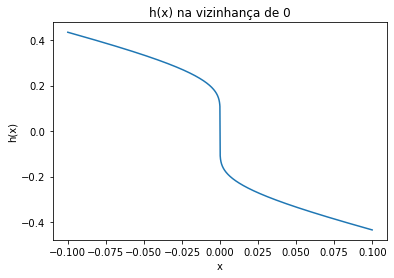

In [16]:
ax = plt.gca()
x = np.arange(-0.1,0.1,0.0001)
y = h(x)
ax.plot(x,y)
ax.set_title("h(x) na vizinhança de 0")
ax.set_xlabel("x")
ax.set_ylabel("h(x)")

In [17]:
assert ax.title.get_text() != ""
assert len(ax.lines) == 1

Faça mais um gráfico, dessa vez comparando a evolução dos erros para as funções $f$, $g$ e $h$.

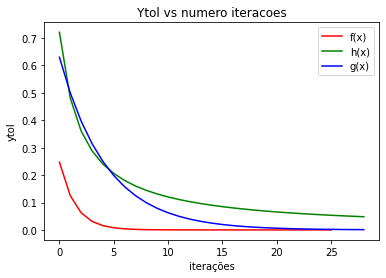

In [18]:
ax = plt.gca()
pts = bissecao_pts(f, a, b, xtol=1e-8, ytol=1e-8, maxiter=100)
f_error = np.abs(f(pts))
pts = bissecao_pts(g, a, b, xtol=1e-8, ytol=1e-8, maxiter=100)
g_error = np.abs(g(pts))
pts = bissecao_pts(h, a, b, xtol=1e-8, ytol=1e-8, maxiter=100)
h_error = np.abs(h(pts))
ax.plot(np.arange(len(f_error)), f_error,color='r', label="f(x)")
ax.plot(np.arange(len(h_error)), h_error,color='g', label="h(x)")
ax.plot(np.arange(len(g_error)), g_error,color='b', label="g(x)")
#ax.legend(["g(x)","f(x)"])
ax.legend()
ax.set_xlabel("iterações")
ax.set_ylabel("ytol")
ax.set_title("Ytol vs numero iteracoes")
plt.show()

In [19]:
assert len(ax.lines) == 3
assert len(ax.legend().texts) == 3
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""
assert ax.get_ylabel() != ""

In [20]:
def compute_derivative(f,x):
    h = 0.00000001
    return (f(x+h) - f(x))/h

Text(0.5, 1.0, 'Log(tol) vs numero iteracoes')

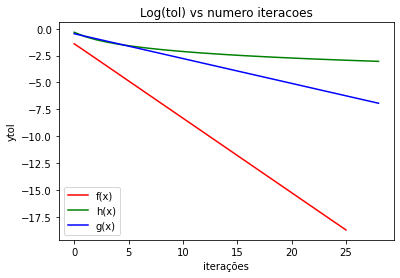

In [21]:
ax = plt.gca()
ax.plot(np.arange(len(f_error)), np.log(f_error),color='r', label="f(x)")
ax.plot(np.arange(len(h_error)), np.log(h_error),color='g', label="h(x)")
ax.plot(np.arange(len(g_error)), np.log(g_error),color='b', label="g(x)")
#ax.legend(["g(x)","f(x)"])
ax.legend()
ax.set_xlabel("iterações")
ax.set_ylabel("ytol")
ax.set_title("Log(tol) vs numero iteracoes")

Text(0.5, 1.0, "f'(x) nas proximidades de 0")

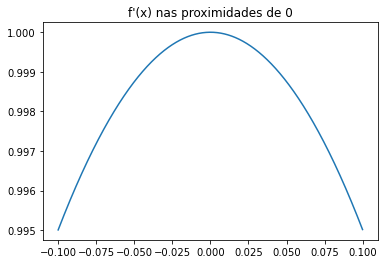

In [22]:
x = np.arange(-0.1,0.1,0.0001)
y = np.array([compute_derivative(f,i) for i in x])
ax = plt.gca()
ax.plot(x,y)
ax.set_title("f'(x) nas proximidades de 0")

Text(0.5, 1.0, "g'(x) nas proximidades de 0")

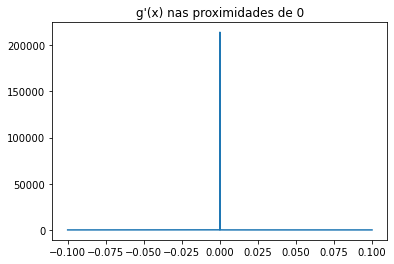

In [23]:
y = np.array([compute_derivative(g,i) for i in x])
ax = plt.gca()
ax.plot(x,y)
ax.set_title("g'(x) nas proximidades de 0")

Text(0.5, 1.0, "h'(x) nas proximidades de 0")

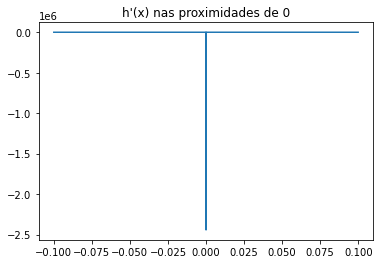

In [24]:
y = np.array([compute_derivative(h,i) for i in x])
ax = plt.gca()
ax.plot(x,y)
ax.set_title("h'(x) nas proximidades de 0")

Text(0.5, 1.0, 'Razão de convergencia')

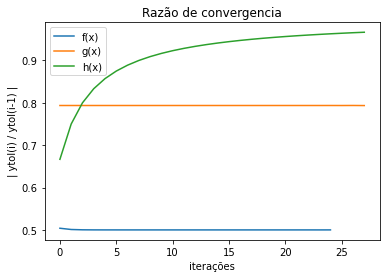

In [45]:
ax = plt.gca()
r_f = [np.abs(f_error[i]/f_error[i-1]) for i in range(1,len(f_error))]
r_g = [np.abs(g_error[i]/g_error[i-1]) for i in range(1,len(g_error))]
r_h = [np.abs(h_error[i]/h_error[i-1]) for i in range(1,len(h_error))]
ax.plot(np.arange(len(f_error) - 1), r_f, label="f(x)")
ax.plot(np.arange(len(g_error) - 1), r_g, label="g(x)")
ax.plot(np.arange(len(h_error) - 1), r_h, label="h(x)")
ax.legend()
ax.set_xlabel("iterações")
ax.set_ylabel("| ytol(i) / ytol(i-1) |")
ax.set_title("Razão de convergencia")

O que aconteceu desta vez? Explique o porquê.

Nesse caso a função h(x) tem uma descontinuidade em 0, e também o fato dela não ser uma função com inclinação suave em torno de 0 dificulta a convergência, pelos mesmos argumentos apresentados anteriormente. Observando o último gráfico, vemos que a taxa de convergência de h(x) tende a 1, um valor maior do que as demais. A convergência dela se enquadra como sendo sub-linear, e isso explica o fato dela ser mais lenta. Um detalhe interessante é que a taxa começa em $\bar{0.66}$, um valor menor que a taxa da raiz cúbica, e logo depois ultrapassa convergindo para 1. Isso explica porque no gráfico de ytol a função h(x) possui um curto pedaço abaixo da raiz cúbica, mas logo depois a de g(x) ultrapassa e se mantém menor até o infinito. Outro ponto é que para h(x) a raiz encontrada é apenas teórica, fruto do limite pela esquerda e pela direita que converge para 0, já que de fato ela não existe. Isso mostra que para bissecção convergir não precisa que a função seja contínua.

## Questão 4: O outro lado da moeda

Para fechar com chave de ouro, vamos estudar a evolução do erro da função $h_2(x) = h^{-1}(x)$, isto é, a função $h_2$ tal que $h_2(h(x)) = x$ (digamos, em uma vizinhança de $x=0$). Implemente a função $h_2$ abaixo:

In [25]:
def h2(x):
    if(x>0):
        return -np.exp(-1/x)
    else:
        return np.exp(1/x)

In [26]:
h2(h(-0.999999999))

-0.999999999

In [27]:
for x in np.linspace(-1+1e-8,1-1e-8,200):
    assert abs(h2(h(x))-x) < 1e-15, (x, x - h2(h(x)))
    assert abs(h(h2(x))-x) < 1e-15, (x, x - h(h2(x)))

Repita os estudos realizados anteriormente, com a inclusão de $h_2$.

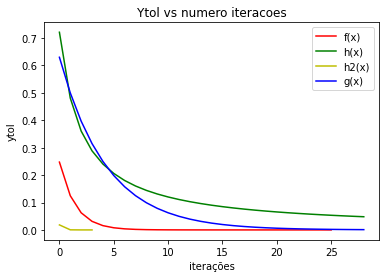

In [28]:
ax = plt.gca()
pts = bissecao_pts(f, a, b, xtol=1e-8, ytol=1e-8, maxiter=100)
f_error = np.abs(f(pts))
pts = bissecao_pts(g, a, b, xtol=1e-8, ytol=1e-8, maxiter=100)
g_error = np.abs(g(pts))
pts = bissecao_pts(h, a, b, xtol=1e-8, ytol=1e-8, maxiter=100)
h_error = np.abs(h(pts))
pts = bissecao_pts(h2, a, b, xtol=1e-8, ytol=1e-8, maxiter=100)
h2_error = np.abs([h2(pt) for pt in pts])
ax.plot(np.arange(len(f_error)), f_error,color='r', label="f(x)")
ax.plot(np.arange(len(h_error)), h_error,color='g', label="h(x)")
ax.plot(np.arange(len(h2_error)), h2_error,color='y', label="h2(x)")
ax.plot(np.arange(len(g_error)), g_error,color='b', label="g(x)")
#ax.legend(["g(x)","f(x)"])
ax.legend()
ax.set_xlabel("iterações")
ax.set_ylabel("ytol")
ax.set_title("Ytol vs numero iteracoes")
plt.show()

Text(0.5, 1.0, 'Log(tol) vs numero iteracoes')

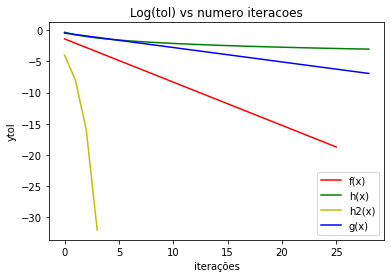

In [29]:
ax = plt.gca()
ax.plot(np.arange(len(f_error)), np.log(f_error),color='r', label="f(x)")
ax.plot(np.arange(len(h_error)), np.log(h_error),color='g', label="h(x)")
ax.plot(np.arange(len(h2_error)), np.log(h2_error),color='y', label="h2(x)")
ax.plot(np.arange(len(g_error)), np.log(g_error),color='b', label="g(x)")
#ax.legend(["g(x)","f(x)"])
ax.legend()
ax.set_xlabel("iterações")
ax.set_ylabel("ytol")
ax.set_title("Log(tol) vs numero iteracoes")

Text(0.5, 1.0, 'h2(x) nas proximidades de 0')

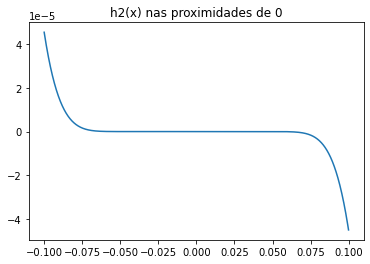

In [49]:
x = np.arange(-0.1,0.1,0.0001)
y = np.array([h2(i) for i in x])
ax = plt.gca()
ax.plot(x,y)
ax.set_title("h2(x) nas proximidades de 0")

Text(0.5, 1.0, "h2'(x) nas proximidades de 0")

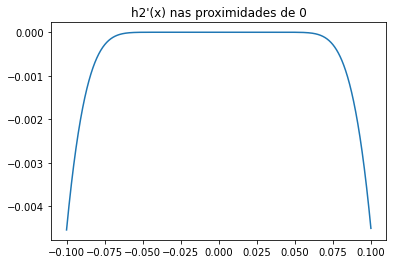

In [50]:
x = np.arange(-0.1,0.1,0.0001)
y = np.array([compute_derivative(h2,i) for i in x])
ax = plt.gca()
ax.plot(x,y)
ax.set_title("h2'(x) nas proximidades de 0")

Text(0.5, 1.0, 'Razão de convergencia')

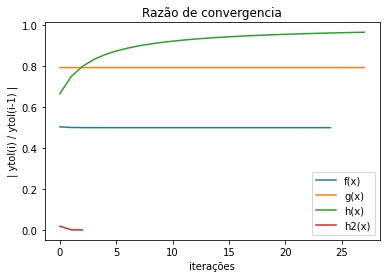

In [51]:
ax = plt.gca()
r_f = [np.abs(f_error[i]/f_error[i-1]) for i in range(1,len(f_error))]
r_g = [np.abs(g_error[i]/g_error[i-1]) for i in range(1,len(g_error))]
r_h = [np.abs(h_error[i]/h_error[i-1]) for i in range(1,len(h_error))]
r2_h = [np.abs(h2_error[i]/h2_error[i-1]) for i in range(1,len(h2_error))]
ax.plot(np.arange(len(f_error) - 1), r_f, label="f(x)")
ax.plot(np.arange(len(g_error) - 1), r_g, label="g(x)")
ax.plot(np.arange(len(h_error) - 1), r_h, label="h(x)")
ax.plot(np.arange(len(h2_error) - 1), r2_h, label="h2(x)")
ax.legend()
ax.set_xlabel("iterações")
ax.set_ylabel("| ytol(i) / ytol(i-1) |")
ax.set_title("Razão de convergencia")

Comente os resultados abaixo.

A convergência de h2 foi bem mais rápida em relação as demais funções. Isso porque em torno de 0 a função é quase um platô e sua derivada é aproximadamente 0. Assim, essa função admite que, para um x mais distante da raiz tenhamos um erro em y bastante próximo de 0, necessitando de uma quantidade menor de iterações. Analisando a razão de convergência, vemos que para h2(x) ela tende a 0, configurando o caso de convergência super-linear. Essa taxa é a menor em relação a todas as anteriores, 0.5, 0.8 e 1, fazendo com que o erro decaia drasticamente após poucas iterações. 